## Laboratorio 2

## Nicolás Echeverri Rojas

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Intuición estadística modelos de machine learning


### 1)  Generando dos distribuciones Gaussianas

In [2]:
x=np.arange(-20,20,0.1)

norm1=norm.pdf(x=x,loc=3, scale=2.5,)
norm2=norm.pdf(x=x,loc=7.5, scale=1.5)

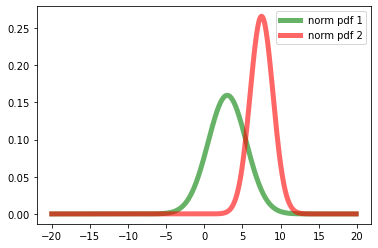

In [3]:
plt.plot(x, norm1,
       'g-', lw=5, alpha=0.6, label='norm pdf 1')

plt.plot(x, norm2,
       'r-', lw=5, alpha=0.6, label='norm pdf 2')
plt.legend()

### 2) Separación del conjunto de datos

La frontera analítica para separar los datos provenientes de las dos distribuciones Gaussianas podría ser una línea recta en el punto en el cual se interceptan las dos distribuciones, sin embargo, existirán algunos puntos que no serán clasificados de manera correcta puesto que existe un sobrelapamiento entre los datos de las dos distribuciones

In [5]:
idx = np.argwhere(np.diff(np.sign(norm1 - norm2))).flatten()
#np.argswhere encuentra los índices del arreglo diferentes de cero
#en este caso, cuando son diferentes de cero significa que existe
#un cambio de signo de la funcón f-g, de tal manera que existe un
#intercepto

In [25]:
x[idx][0]

5.400000000000361

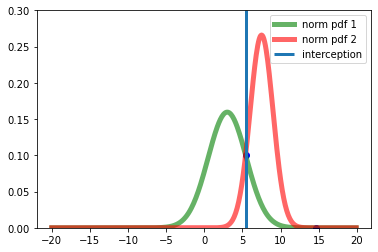

In [33]:
plt.plot(x[idx], norm1[idx], 'bo')

plt.plot(x, norm1,
       'g-', lw=5, alpha=0.6, label='norm pdf 1')

plt.plot(x, norm2,
       'r-', lw=5, alpha=0.6, label='norm pdf 2')

plt.vlines(x=x[idx][0],ymin=0,ymax=0.3,lw=3,label="interception")
plt.ylim(0,0.3)
plt.legend()

De tal manera que la ecuación x=5.4 podría servir a priori para realizar una separación del conjunto de datos

## Modelo de machine learning

### 1) generando muestras aleatorias de las dos distribuciones

In [34]:
norm1=norm.rvs(loc=3, scale=2.5,size=100)
norm2=norm.rvs(loc=7.5, scale=1.5,size=100)

### 2) Histograma del conjunto de datos

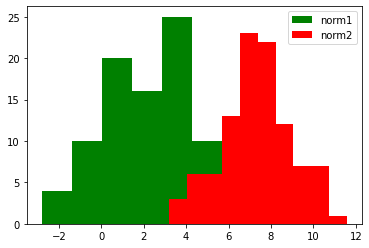

In [35]:
plt.hist(norm1,bins=int(np.sqrt(100)), color='green', label='norm1')
plt.hist(norm2,bins=int(np.sqrt(100)), color='red', label='norm2')
plt.legend()

In [36]:
import pandas as pd

In [37]:
zeros=[0 for i in range(len(norm1))]
ones=[1 for i in range(len(norm2))]

len(zeros+ones)

200

### 3) Construcción del DataFrame

In [38]:
df=pd.DataFrame(data={'labels': zeros+ones, 'features':np.concatenate((norm1,norm2))   }  )

In [39]:
df.head()

,labels,features
0,0,1.773570
1,0,3.542315
2,0,1.102898
3,0,4.733588
4,0,5.067676


## 4)

In [40]:
norm1_test=norm.rvs(loc=3, scale=2.5,size=25)
norm2_test=norm.rvs(loc=7.5, scale=1.5,size=25)

zeros=[0 for i in range(len(norm1_test))]
ones=[1 for i in range(len(norm2_test))]

df_test=pd.DataFrame(data={'labels': zeros+ones,
                           'features':np.concatenate((norm1_test,norm2_test))   }  )

In [41]:
df_test.head(2)

,labels,features
0,0,3.564314
1,0,-1.001048


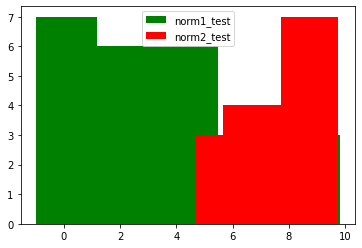

In [42]:
plt.hist(norm1_test,bins=int(np.sqrt(25)), color='green', label='norm1_test')
plt.hist(norm2_test,bins=int(np.sqrt(25)), color='red', label='norm2_test')
plt.legend()

## 1. Probando modelo de machine learning


### Linear regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
X_train=np.array(df['features']).reshape((-1,1))
y_train=np.array(df['labels'] ) 


X_test=np.array(df_test['features']).reshape((-1,1))
y_test=np.array(df_test['labels'])

In [45]:
y_test.shape

(50,)

In [46]:
np.shape(X_train)

(200, 1)

In [47]:
clf=LinearRegression()
clf.fit(X_train, y_train  )

LinearRegression()

In [48]:
score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)

score_train,score_test

(0.5008091465329599, 0.4393144009501496)

Se observa que el score es bastante bajo puesto que en los datos de test es de alrededor de 0.44 y como una prediccón perfecta posee un score de 1 entonces se está lejos de tener predicciones confiables

### Arboles de decisión

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
DT=DecisionTreeClassifier(max_depth=3)
DT.fit(X_train, y_train)

score_train = DT.score(X_train, y_train)
score_test = DT.score(X_test, y_test)

score_train,score_test

(0.885, 0.84)

Un valor de score en los datos de test mucho mejor en comparación a los encontrados en la regresión lineal

### Support vector classifier (SVC)

In [51]:
from sklearn.svm import SVC

In [52]:
SV=SVC(kernel="linear", C=0.025)
SV.fit(X_train, y_train)

score_train = SV.score(X_train, y_train)
score_test = SV.score(X_test, y_test)

score_train, score_test

(0.85, 0.86)

### 2. Grid Search

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc=RandomForestClassifier()

In [57]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [58]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

### Best params Random Forest

In [59]:
rfcBest=RandomForestClassifier(**CV_rfc.best_params_)

In [60]:
rfcBest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200)

In [61]:
score_train = rfcBest.score(X_train, y_train)
score_test = rfcBest.score(X_test, y_test)

score_train, score_test

(0.925, 0.84)

### 3. Learning curve

In [62]:
from sklearn.model_selection import learning_curve

In [63]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\nico0\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

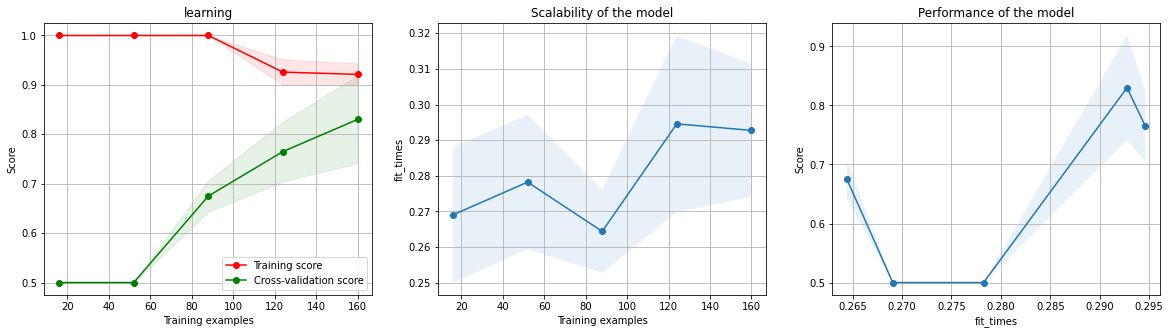

In [64]:
plot_learning_curve(rfcBest,
                    'learning',X_train,y_train)

## Curva de aprendizaje para diferentes valores de las distribuciones

- Datos de entrenamiento 30. media1=7.5, media2=10, desv1=1, desv1=1
- Datos de entrenamiento 100. media1=7.5, media2=10, desv1=1, desv1=1

In [82]:
def Train_samples(mean1,mean2, std1,std2,samples):
    norm1=norm.rvs(loc=mean1, scale=std1,size=samples)
    norm2=norm.rvs(loc=mean2, scale=std2,size=samples)
    
    zeros=[0 for i in range(len(norm1))]
    ones=[1 for i in range(len(norm2))]

    df=pd.DataFrame(data={'labels': zeros+ones,
     'features':np.concatenate((norm1,norm2))   }  )

    X_train=np.array(df['features']).reshape((-1,1))
    y_train=np.array(df['labels'] ) 
    
    plt.hist(norm1,bins=int(np.sqrt(samples)), color='green', label='norm1')
    plt.hist(norm2,bins=int(np.sqrt(samples)), color='red', label='norm2')
    plt.legend()
    
    return X_train,y_train

<module 'matplotlib.pyplot' from 'C:\\Users\\nico0\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

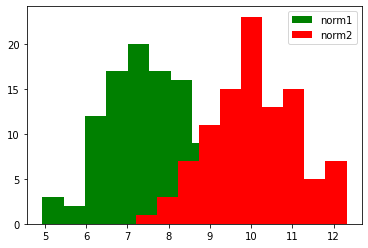

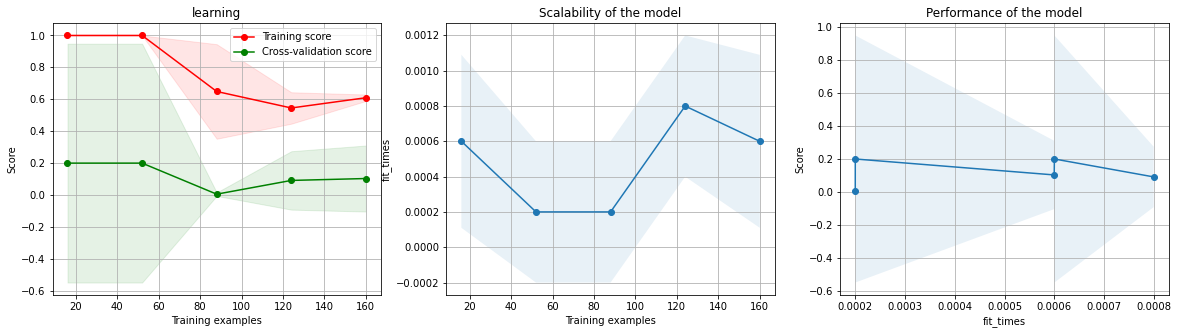

In [83]:
X_train,y_train=Train_samples(mean1=7.5,mean2=10, std1=1,std2=1,samples=100)

plot_learning_curve(LinearRegression(),'learning',X_train,y_train)

Se observa que entre mayor es el tamaño de muestras, menor es el score en los datos de train puesto que al incrementar el número de datos, el algoritmo debe de generalizar más información lo cual aumenta el error. 

En cuanto a los resultados del cross_validation se esperaría que aumentara al incrementar las muestras sin embargo, esto no ocurre lo que indica que la regresión lineal no es un buen predictor para el problema.

En la escalabilidad se esperaría que aumentara el tiempo de cómputo al aumentar el tamaño de los datos de entrenamiento, sin embargo esto no sucede ya que al poseer tan pocos datos el tiempo de cómputo no difiere mucho entre tamaños del conjunto de train.

- Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 2, desv1 = 2

<module 'matplotlib.pyplot' from 'C:\\Users\\nico0\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

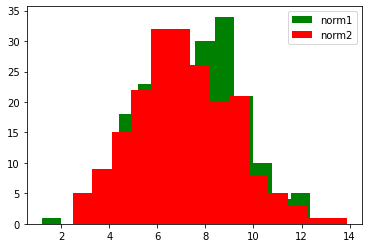

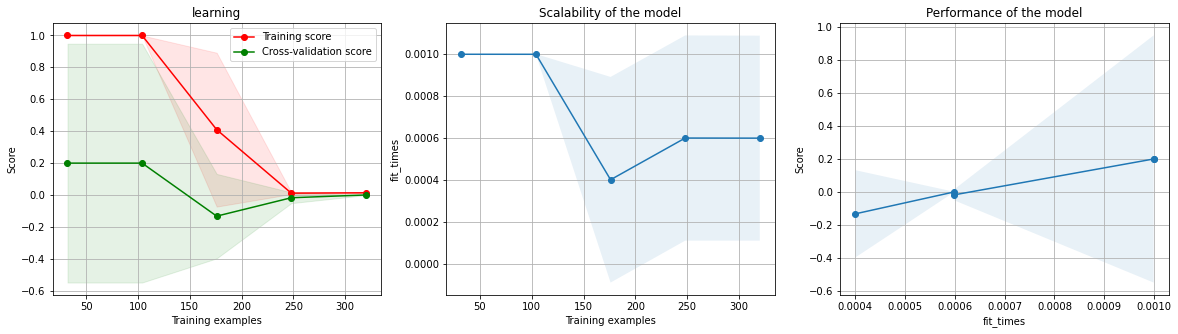

In [84]:
X_train,y_train=Train_samples(mean1=7.5,mean2=7.0, std1=2,std2=2,samples=200)

plot_learning_curve(LinearRegression(),'learning',X_train,y_train)

Se observa que entre mayor es el tamaño de muestras, menor es el score en los datos de train puesto que al incrementar el número de datos, el algoritmo debe de generalizar más información lo cual aumenta el error. 

En cuanto a los resultados del cross_validation se esperaría que aumentara al incrementar las muestras sin embargo, esto no ocurre, al contrario, baja hasta igualar al score en los datos de train. esto puede ser debido a que al aumentar los tamaños, se aumenta la variabilidad en los datos y como las distribuciones están muy superpuestas entonces el algoritmo no es capaz de generalizar las predicciones, lo que indica que la regresión lineal no es un buen predictor para el problema.

En la escalabilidad se esperaría que aumentara el tiempo de cómputo al aumentar el tamaño de los datos de entrenamiento, sin embargo esto no sucede ya que al poseer tan pocos datos el tiempo de cómputo no difiere mucho entre tamaños del conjunto de train.


- Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 0.5, desv1 = 0.5

<module 'matplotlib.pyplot' from 'C:\\Users\\nico0\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

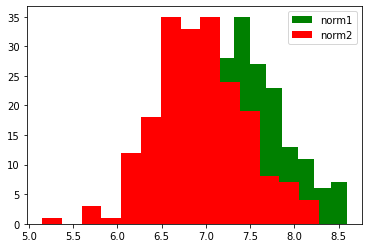

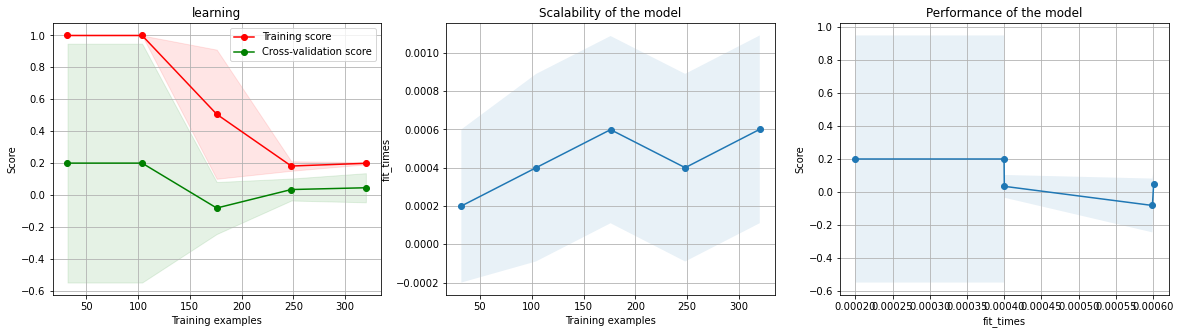

In [85]:
X_train,y_train=Train_samples(mean1=7.5,mean2=7.0, std1=0.5,std2=0.5,samples=200)

plot_learning_curve(LinearRegression(),'learning',X_train,y_train)

Se observa que entre mayor es el tamaño de muestras, menor es el score en los datos de train puesto que al incrementar el número de datos, el algoritmo debe de generalizar más información lo cual aumenta el error.

En cuanto a los resultados del cross_validation se esperaría que aumentara al incrementar las muestras sin embargo, esto no ocurre, al contrario, baja. esto puede ser debido a que al aumentar los tamaños, se aumenta la variabilidad en los datos y como las distribuciones están muy superpuestas entonces el algoritmo no es capaz de generalizar las predicciones, lo que indica que la regresión lineal no es un buen predictor para el problema.

En la escalabilidad se esperaría que aumentara el tiempo de cómputo al aumentar el tamaño de los datos de entrenamiento, sin embargo esto no sucede ya que al poseer tan pocos datos el tiempo de cómputo no difiere mucho entre tamaños del conjunto de train.